# Task 4

## By: Ahmed Eraki
## Mail : ahmedmohamed9667@gmail.com

#### Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Ahmed9667/PRODIGY-Data-Science-Internship/main/PRODIGY_DS_04/twitter_training.csv',
        names = ['ID','Trend','Sentiment','Comment'])
df

,ID,Trend,Sentiment,Comment
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [3]:
df.shape

(74682, 4)

In [4]:
df.columns

Index(['ID', 'Trend', 'Sentiment', 'Comment'], dtype='object')

In [5]:
df.isnull().sum()

ID             0
Trend          0
Sentiment      0
Comment      686
dtype: int64

We do not need empty comments so we will drop them

In [6]:
df.dropna(axis = 0 , inplace= True)

In [7]:
df.isnull().sum()

ID           0
Trend        0
Sentiment    0
Comment      0
dtype: int64

There are no null values

In [8]:
# check for duplicated values
df.duplicated().sum()

2340

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
# Now check for duplicated values
df.duplicated().sum()

0

In [11]:
df['Trend'].value_counts()

TomClancysRainbowSix                 2328
Verizon                              2319
MaddenNFL                            2315
CallOfDuty                           2314
Microsoft                            2304
WorldOfCraft                         2300
NBA2K                                2299
LeagueOfLegends                      2296
TomClancysGhostRecon                 2291
Facebook                             2289
ApexLegends                          2278
johnson&johnson                      2257
Battlefield                          2255
Amazon                               2249
CallOfDutyBlackopsColdWar            2242
FIFA                                 2238
Dota2                                2225
Overwatch                            2220
Hearthstone                          2219
HomeDepot                            2216
GrandTheftAuto(GTA)                  2208
Borderlands                          2206
Xbox(Xseries)                        2201
Google                            

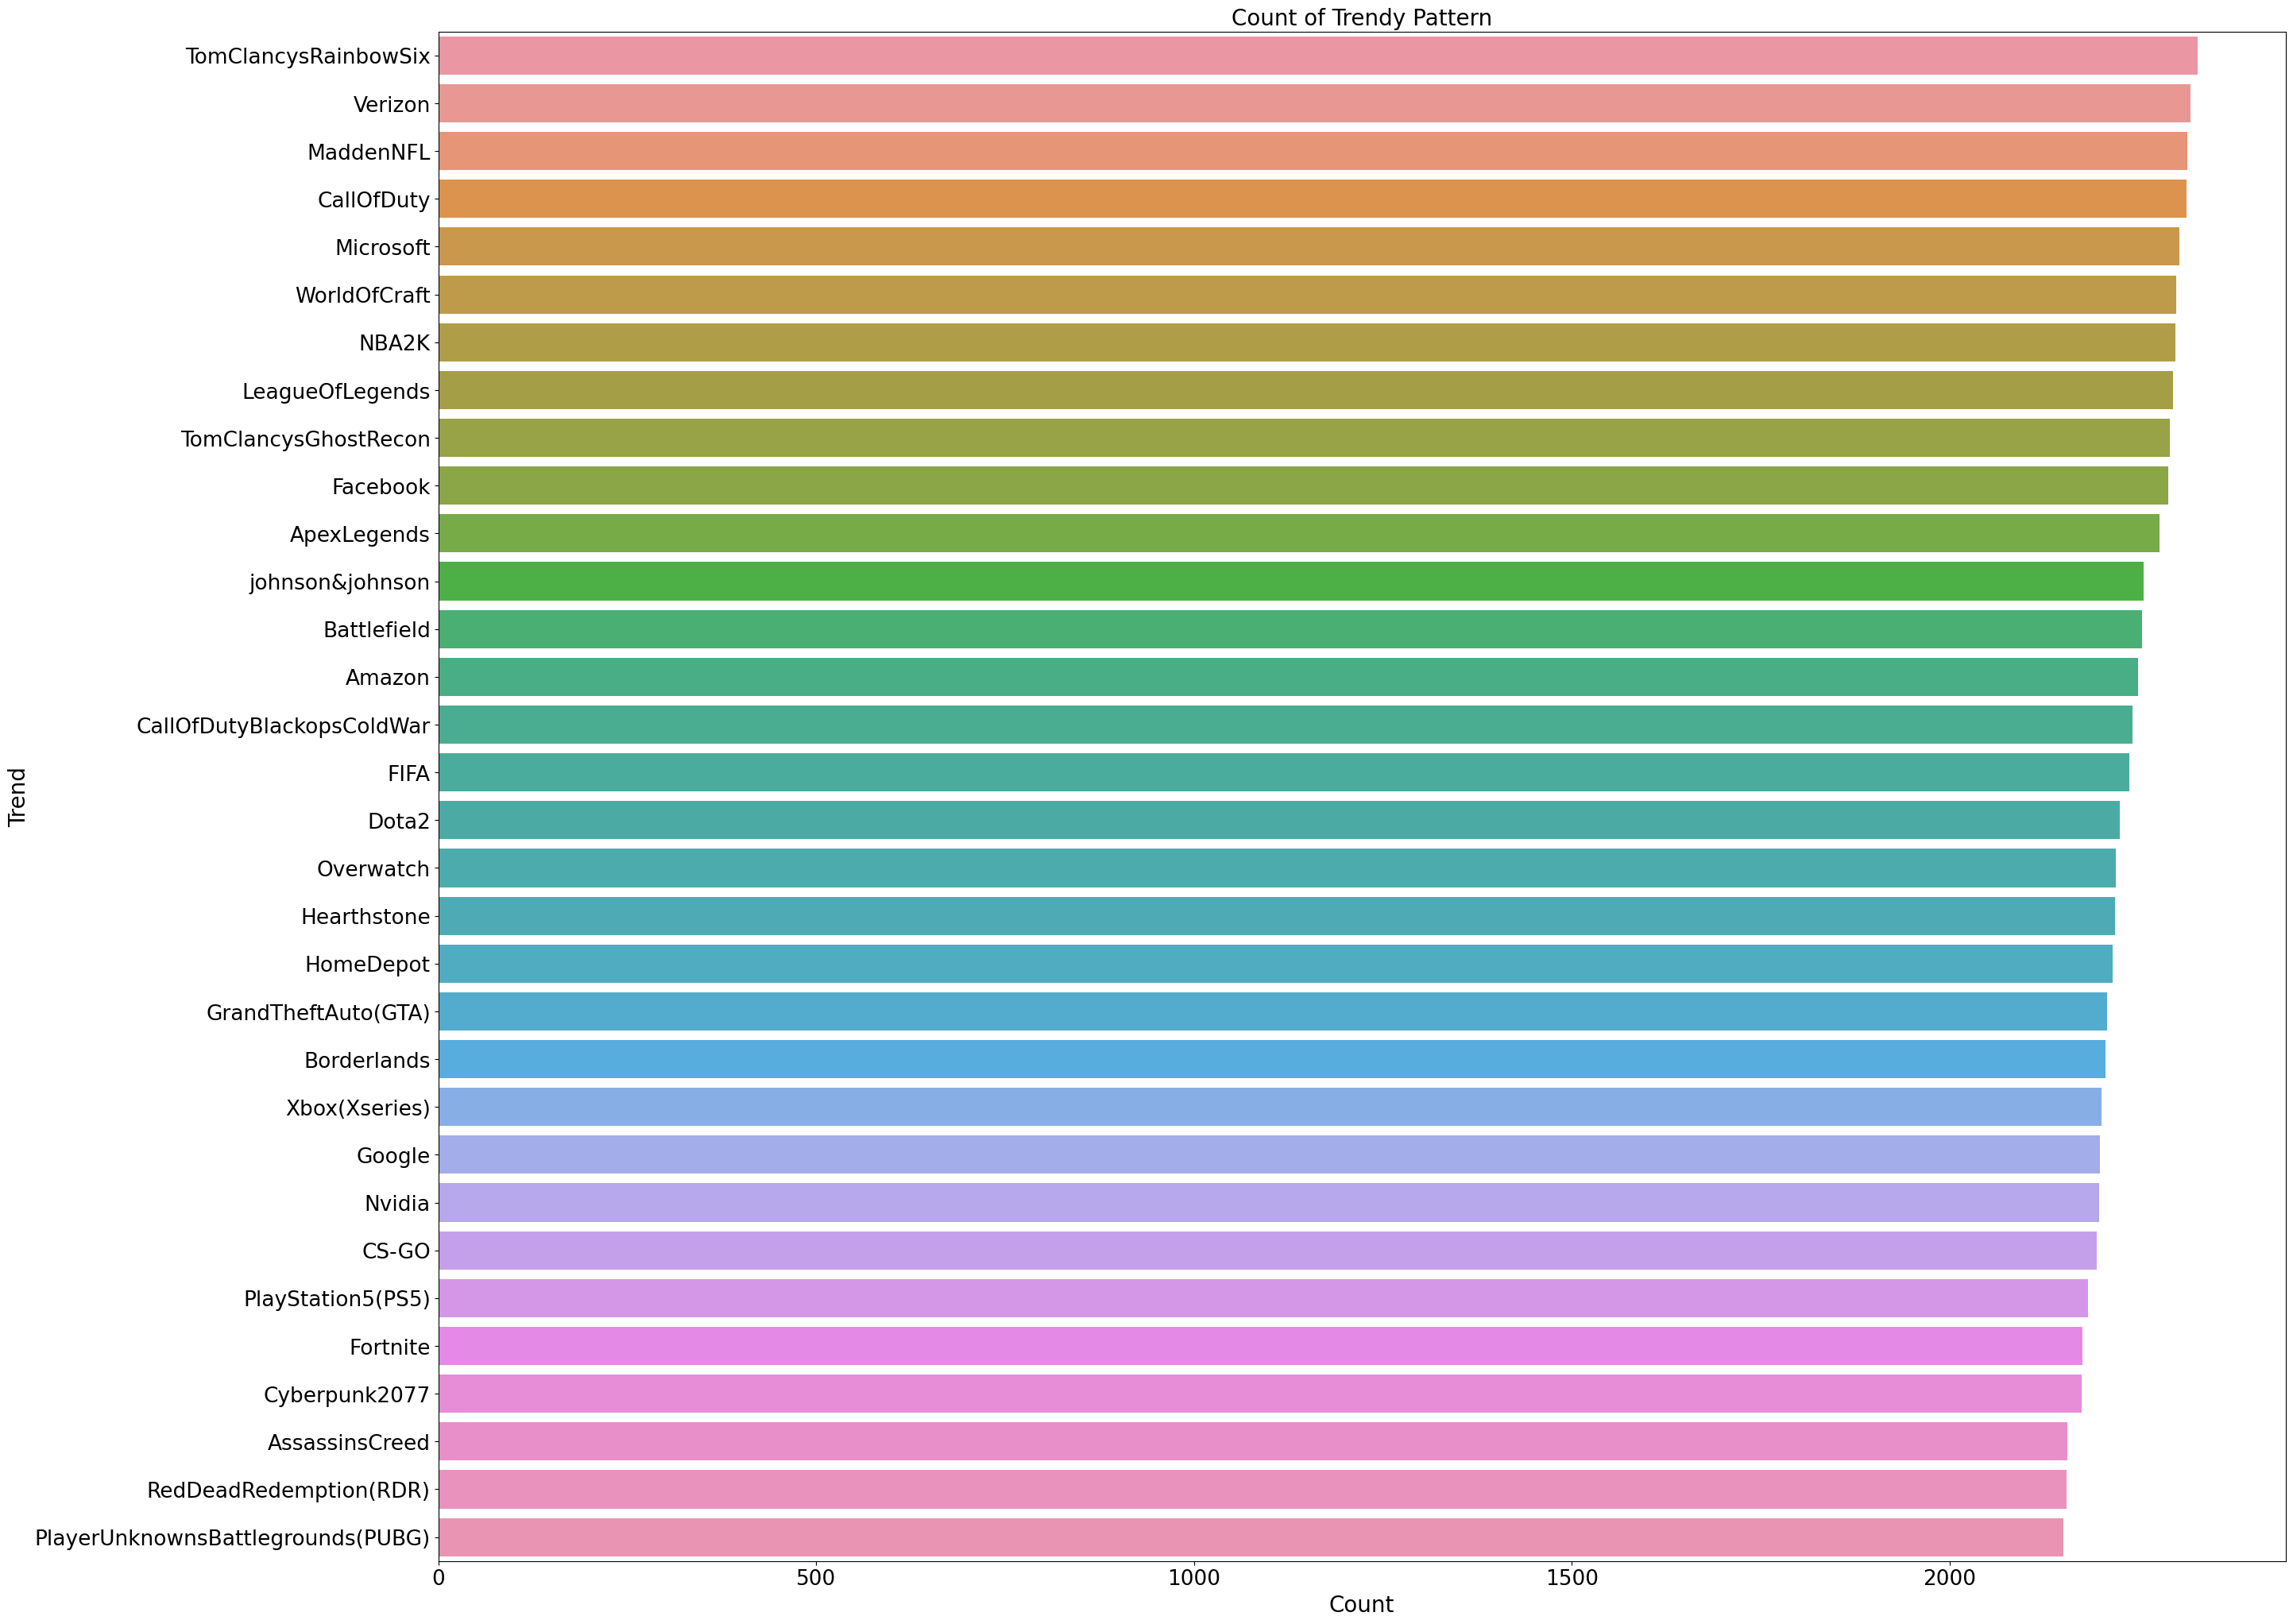

In [12]:
data = df['Trend'].value_counts()
plt.figure(figsize=(30,25))
sns.barplot(x= data.values , y= data.index)
plt.title('Count of Trendy Pattern' , fontsize=20)
plt.xlabel('Count' , fontsize=20)
plt.ylabel('Trend' , fontsize=20)
plt.xticks(fontsize=19)
plt.yticks(fontsize=19)
plt.show()

- TomClancysRainbowSix is the most played game among those who commented
- PlayerUnknownsBattlegrounds(PUBG) is the lowest played game amng those who commented

In [13]:
df['Sentiment'].value_counts()

Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: Sentiment, dtype: int64

In [14]:
df['Sentiment'].value_counts().index

Index(['Negative', 'Positive', 'Neutral', 'Irrelevant'], dtype='object')

In [15]:
df['Sentiment'].value_counts().values

array([21698, 19713, 17708, 12537], dtype=int64)

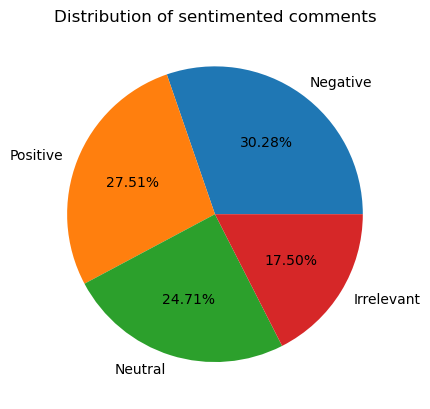

In [16]:
plt.pie(x= df['Sentiment'].value_counts() , labels = df['Sentiment'].value_counts().index 
       ,autopct='%0.2f%%')
plt.title('Distribution of sentimented comments')
plt.show()

- 30.28 % of comments were negative 
- 27.51% of comments were negative
- 24.71% of comments were Neutral
- 17.50 % f comments were irrelevant

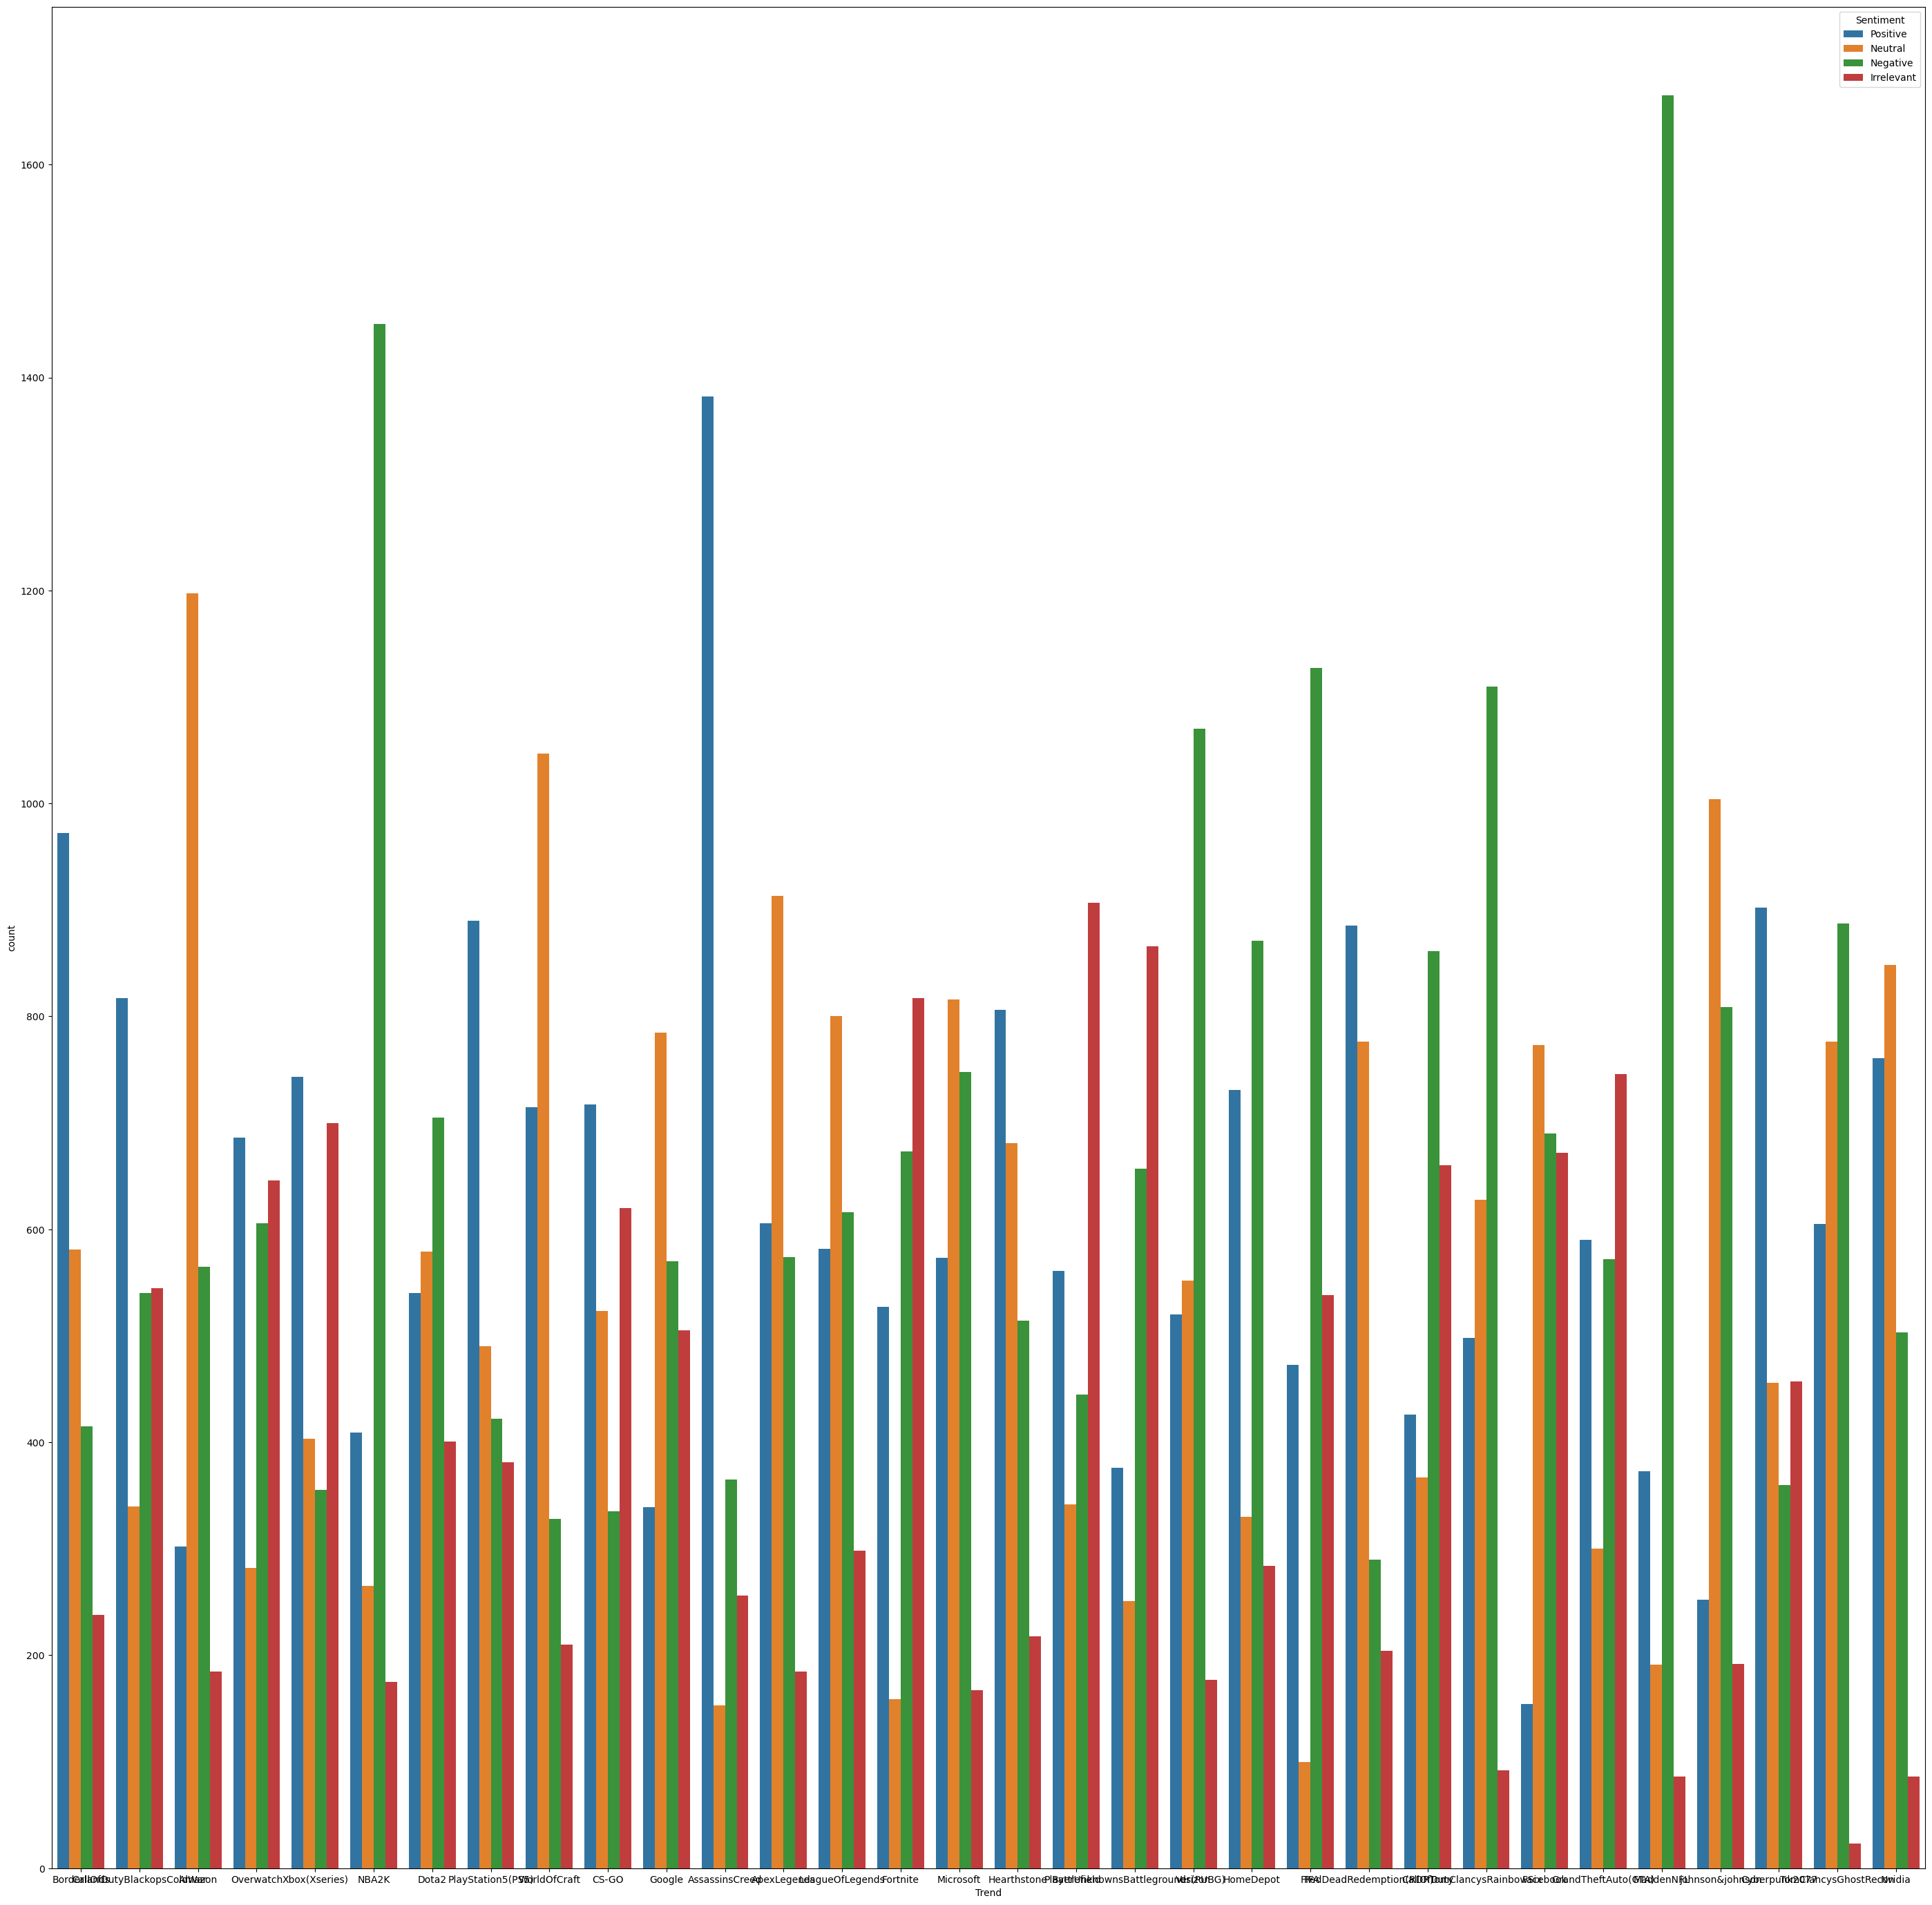

In [17]:
plt.figure(figsize=(35,35))
sns.countplot(data = df , x=df['Trend'] , hue=df['Sentiment'])
plt.show()

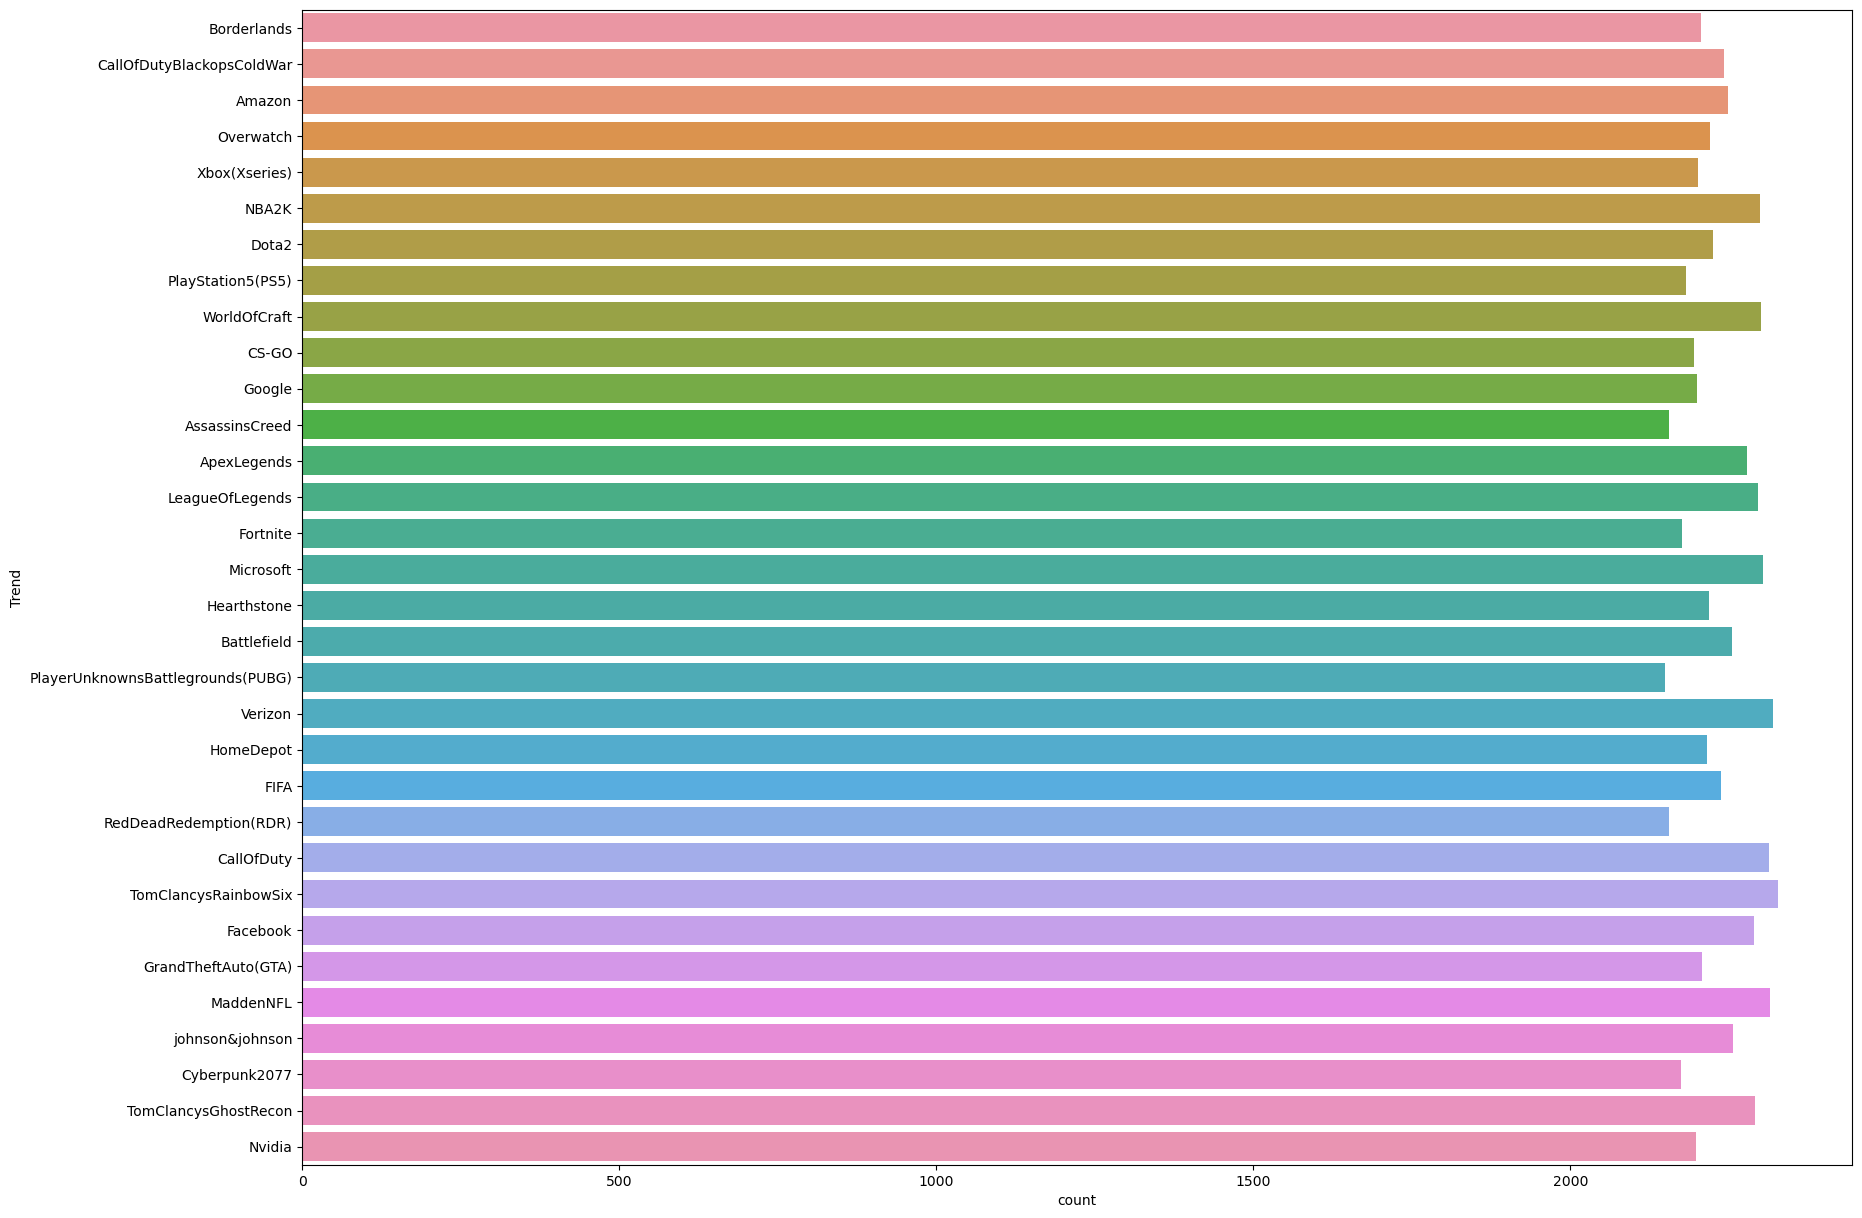

In [18]:
plt.figure(figsize=(20,15))

sns.countplot(y= df['Trend'] , data = df[df['Sentiment'] == 'Negative'])
plt.show()

In [19]:
data = df['Trend'].value_counts().sort_values(ascending=False)
data

TomClancysRainbowSix                 2328
Verizon                              2319
MaddenNFL                            2315
CallOfDuty                           2314
Microsoft                            2304
WorldOfCraft                         2300
NBA2K                                2299
LeagueOfLegends                      2296
TomClancysGhostRecon                 2291
Facebook                             2289
ApexLegends                          2278
johnson&johnson                      2257
Battlefield                          2255
Amazon                               2249
CallOfDutyBlackopsColdWar            2242
FIFA                                 2238
Dota2                                2225
Overwatch                            2220
Hearthstone                          2219
HomeDepot                            2216
GrandTheftAuto(GTA)                  2208
Borderlands                          2206
Xbox(Xseries)                        2201
Google                            

In [20]:
df['Sentiment'].value_counts().index

Index(['Negative', 'Positive', 'Neutral', 'Irrelevant'], dtype='object')

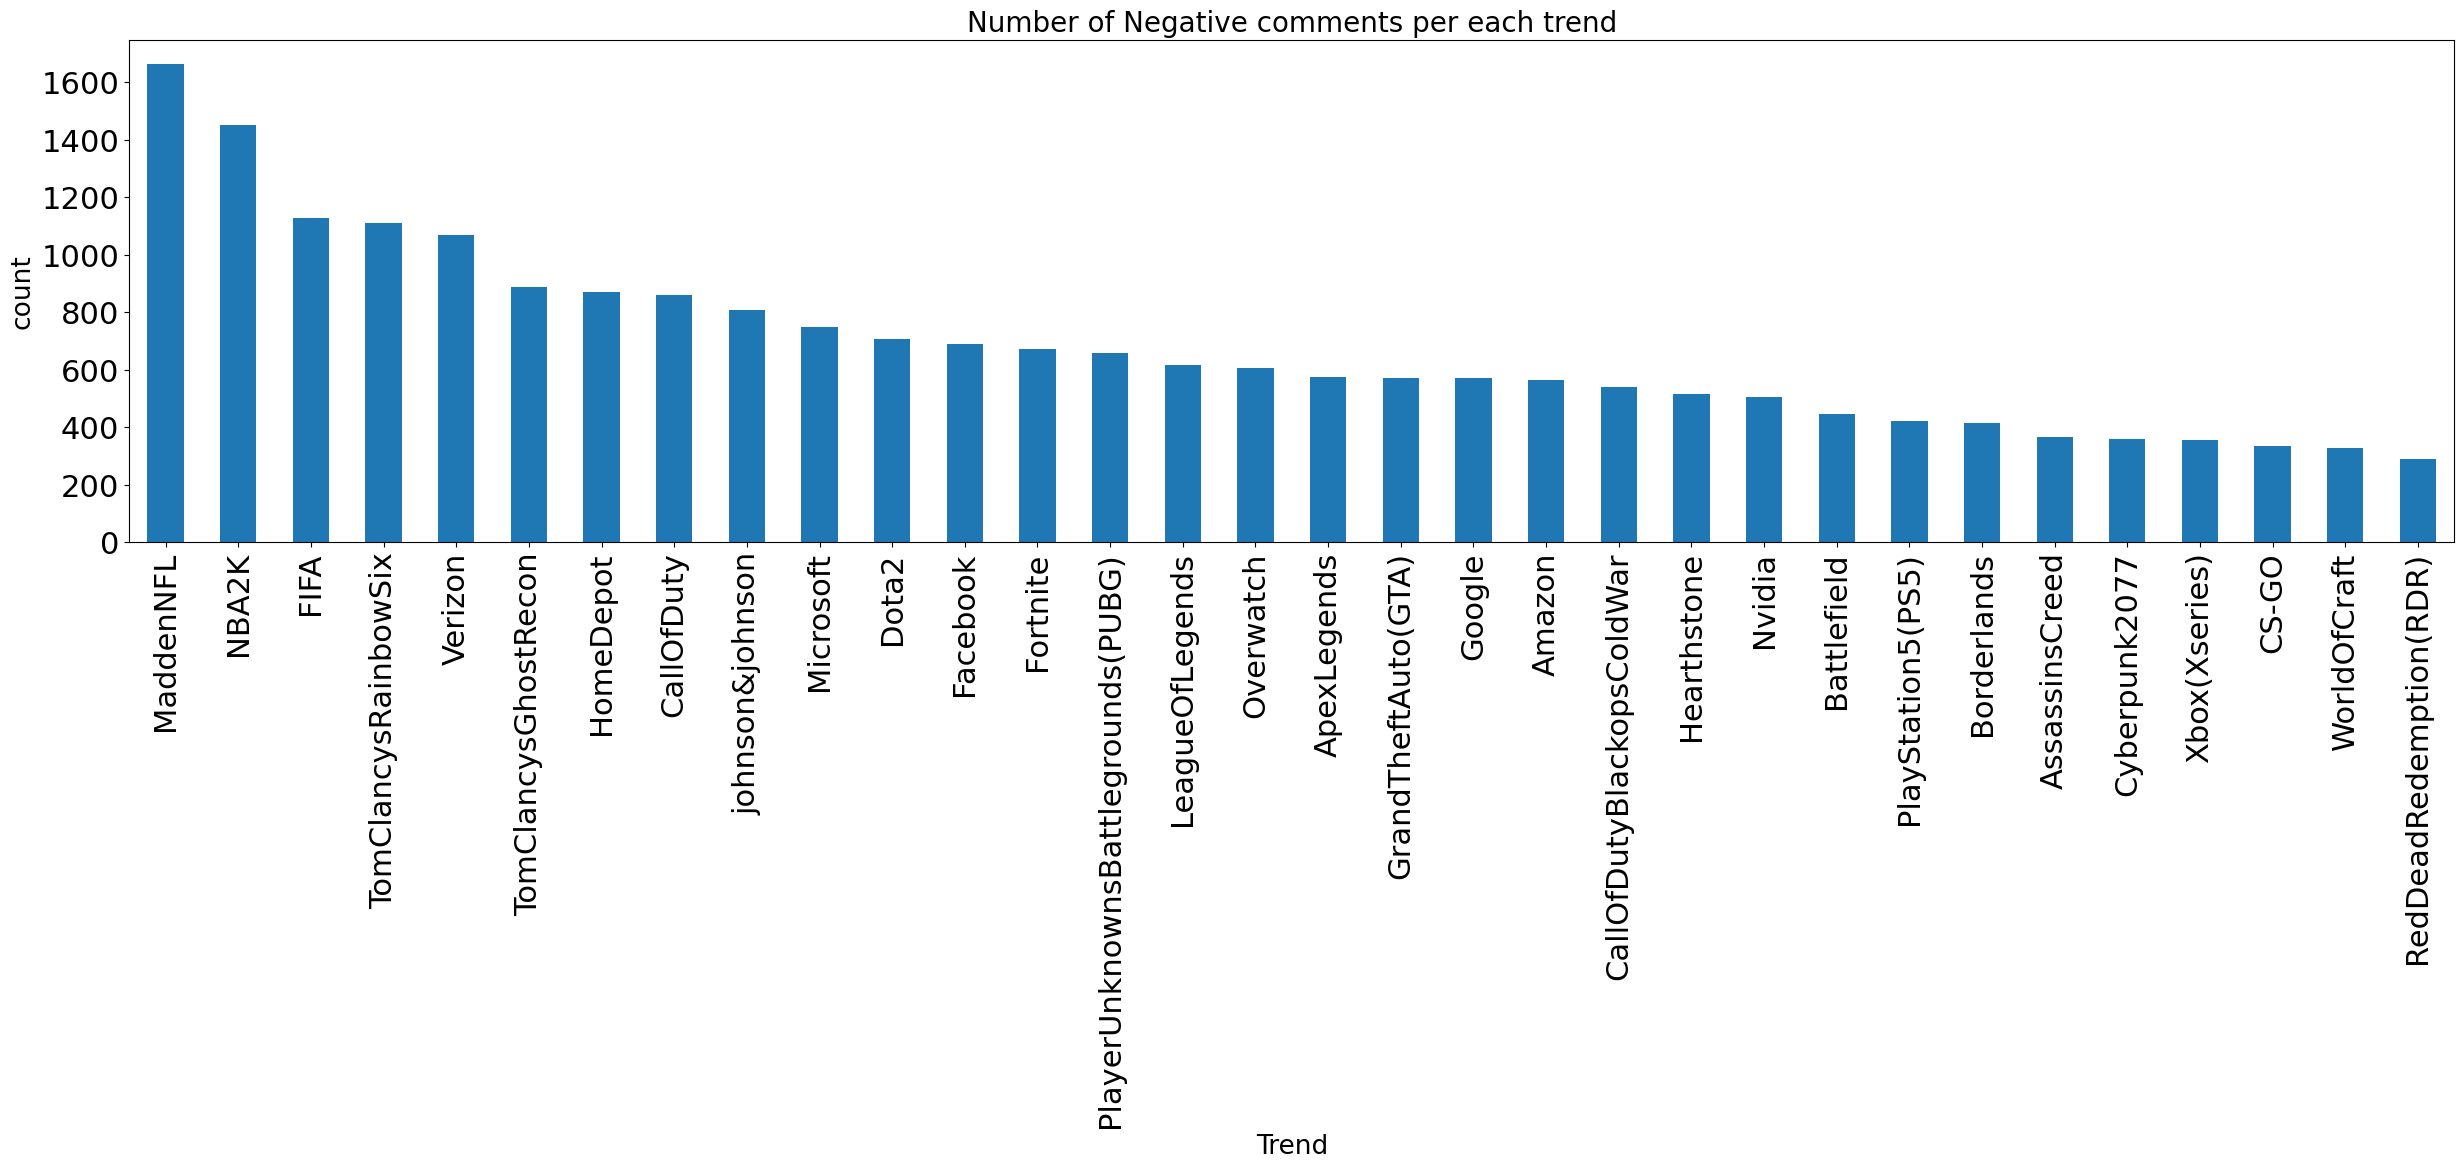

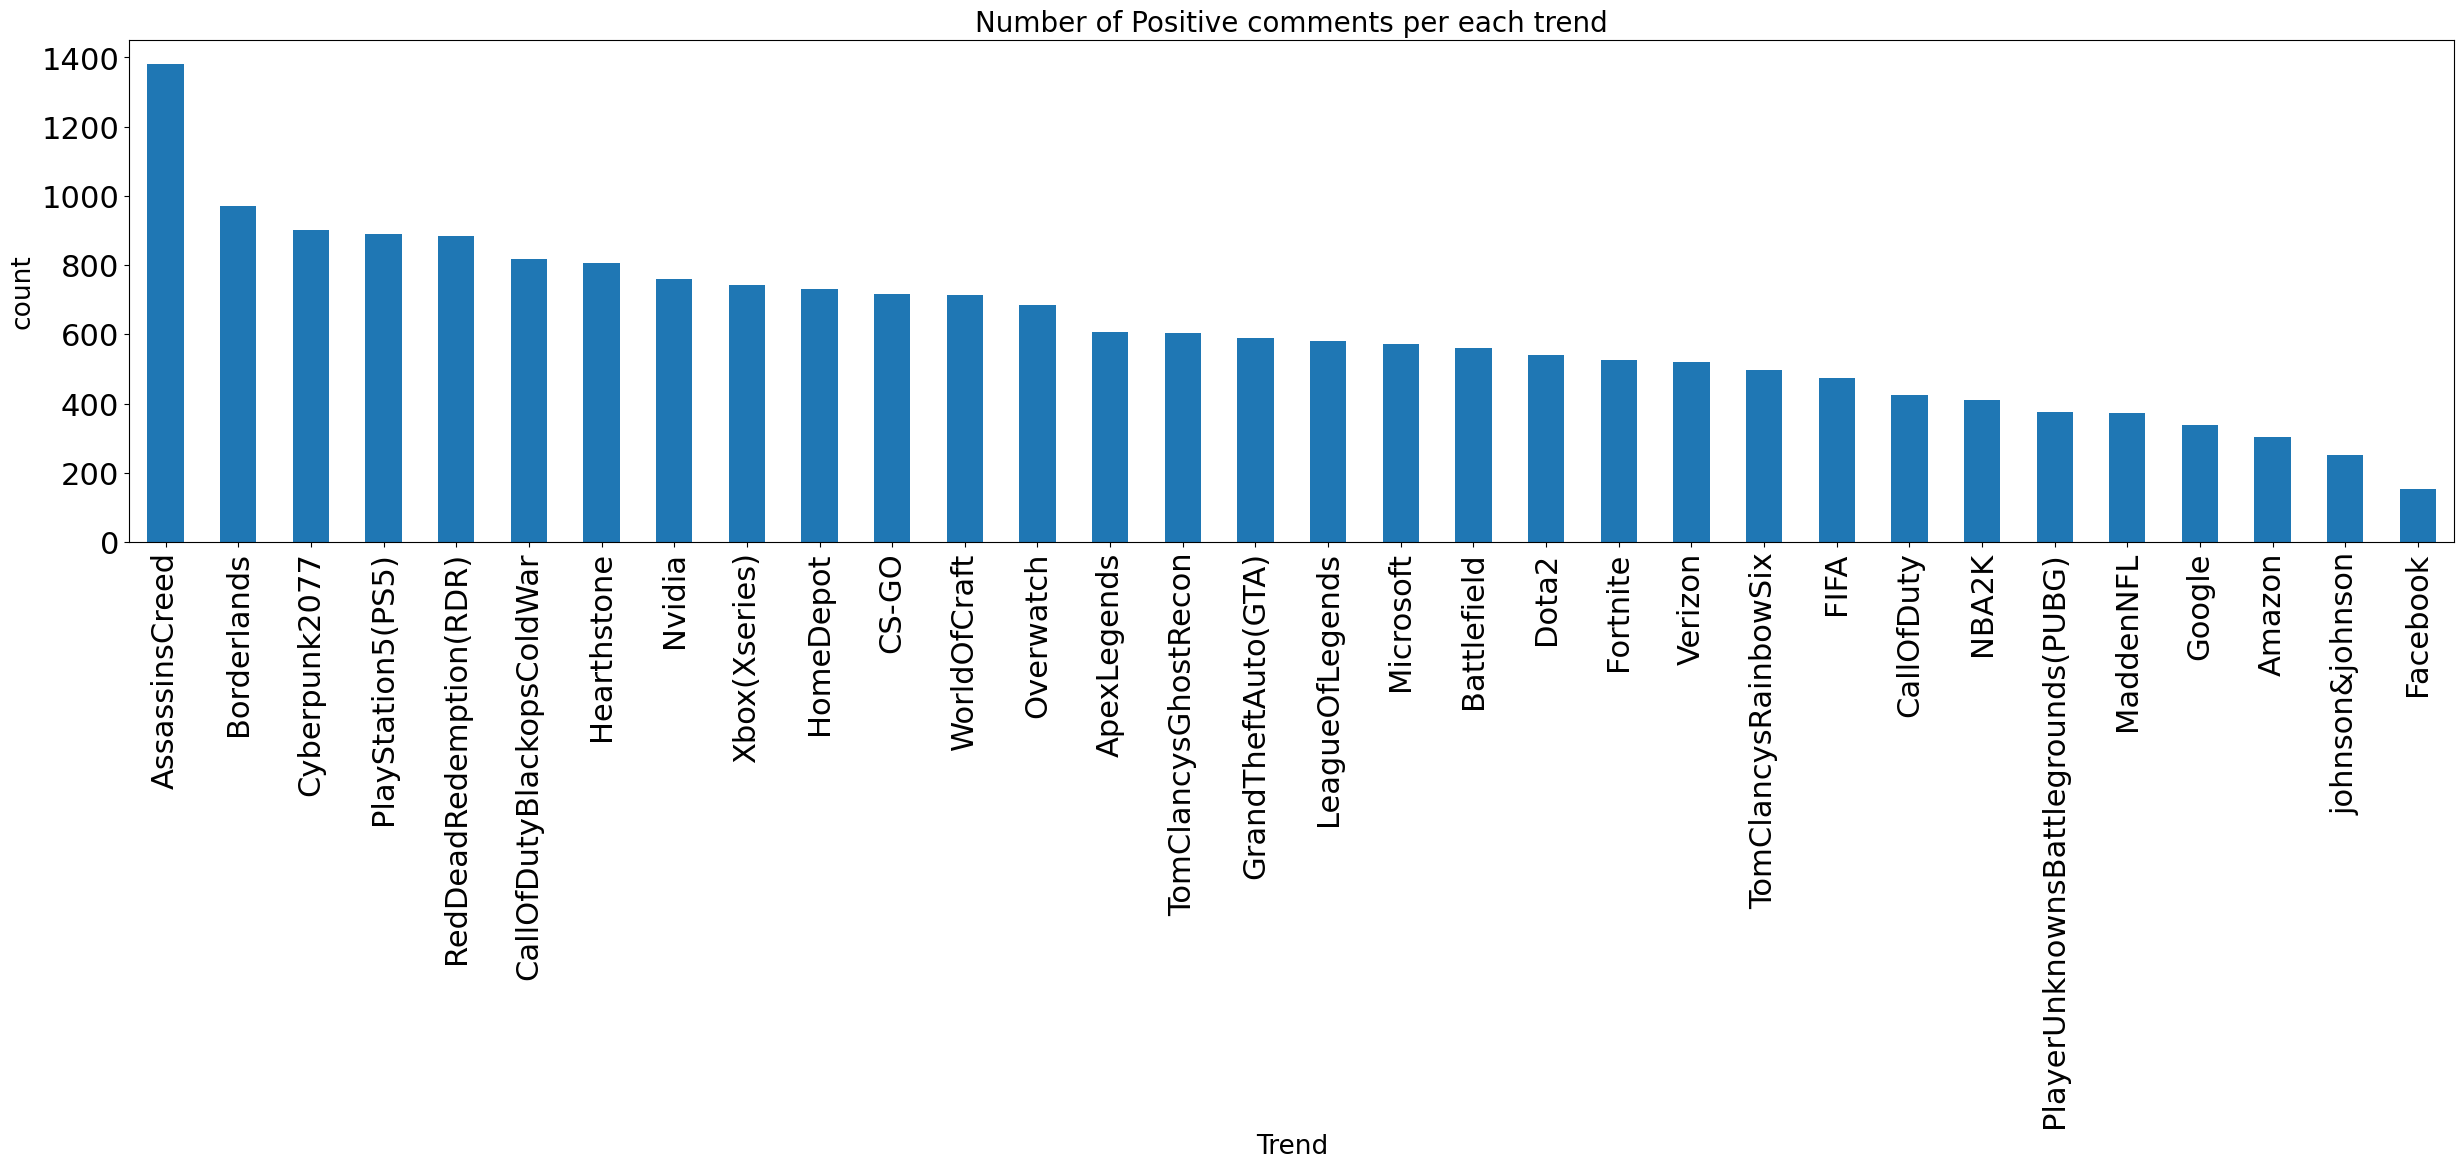

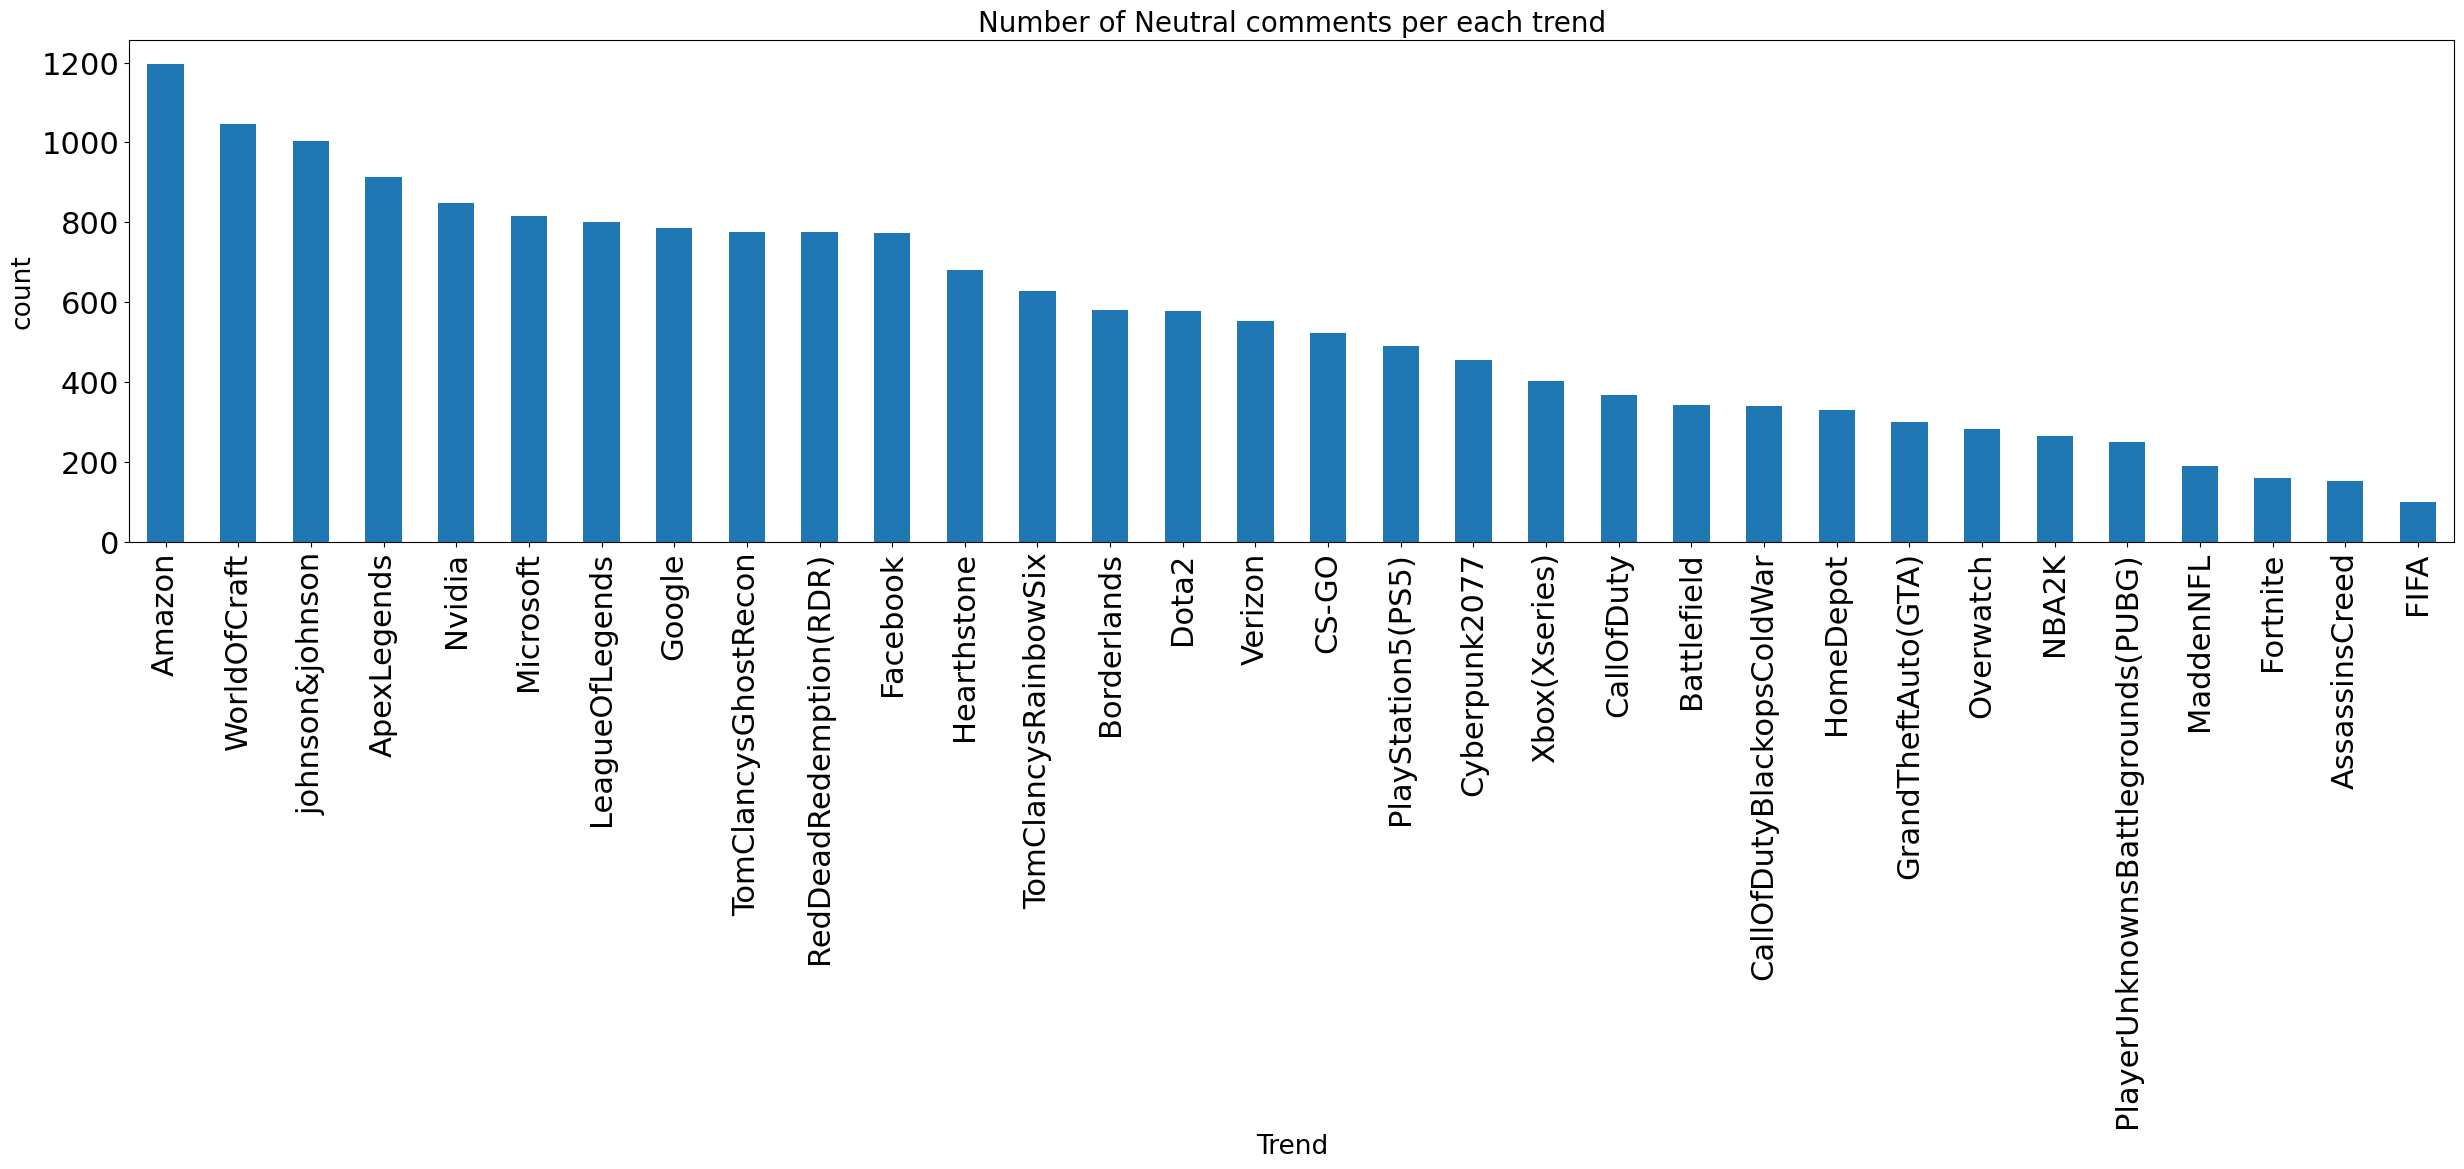

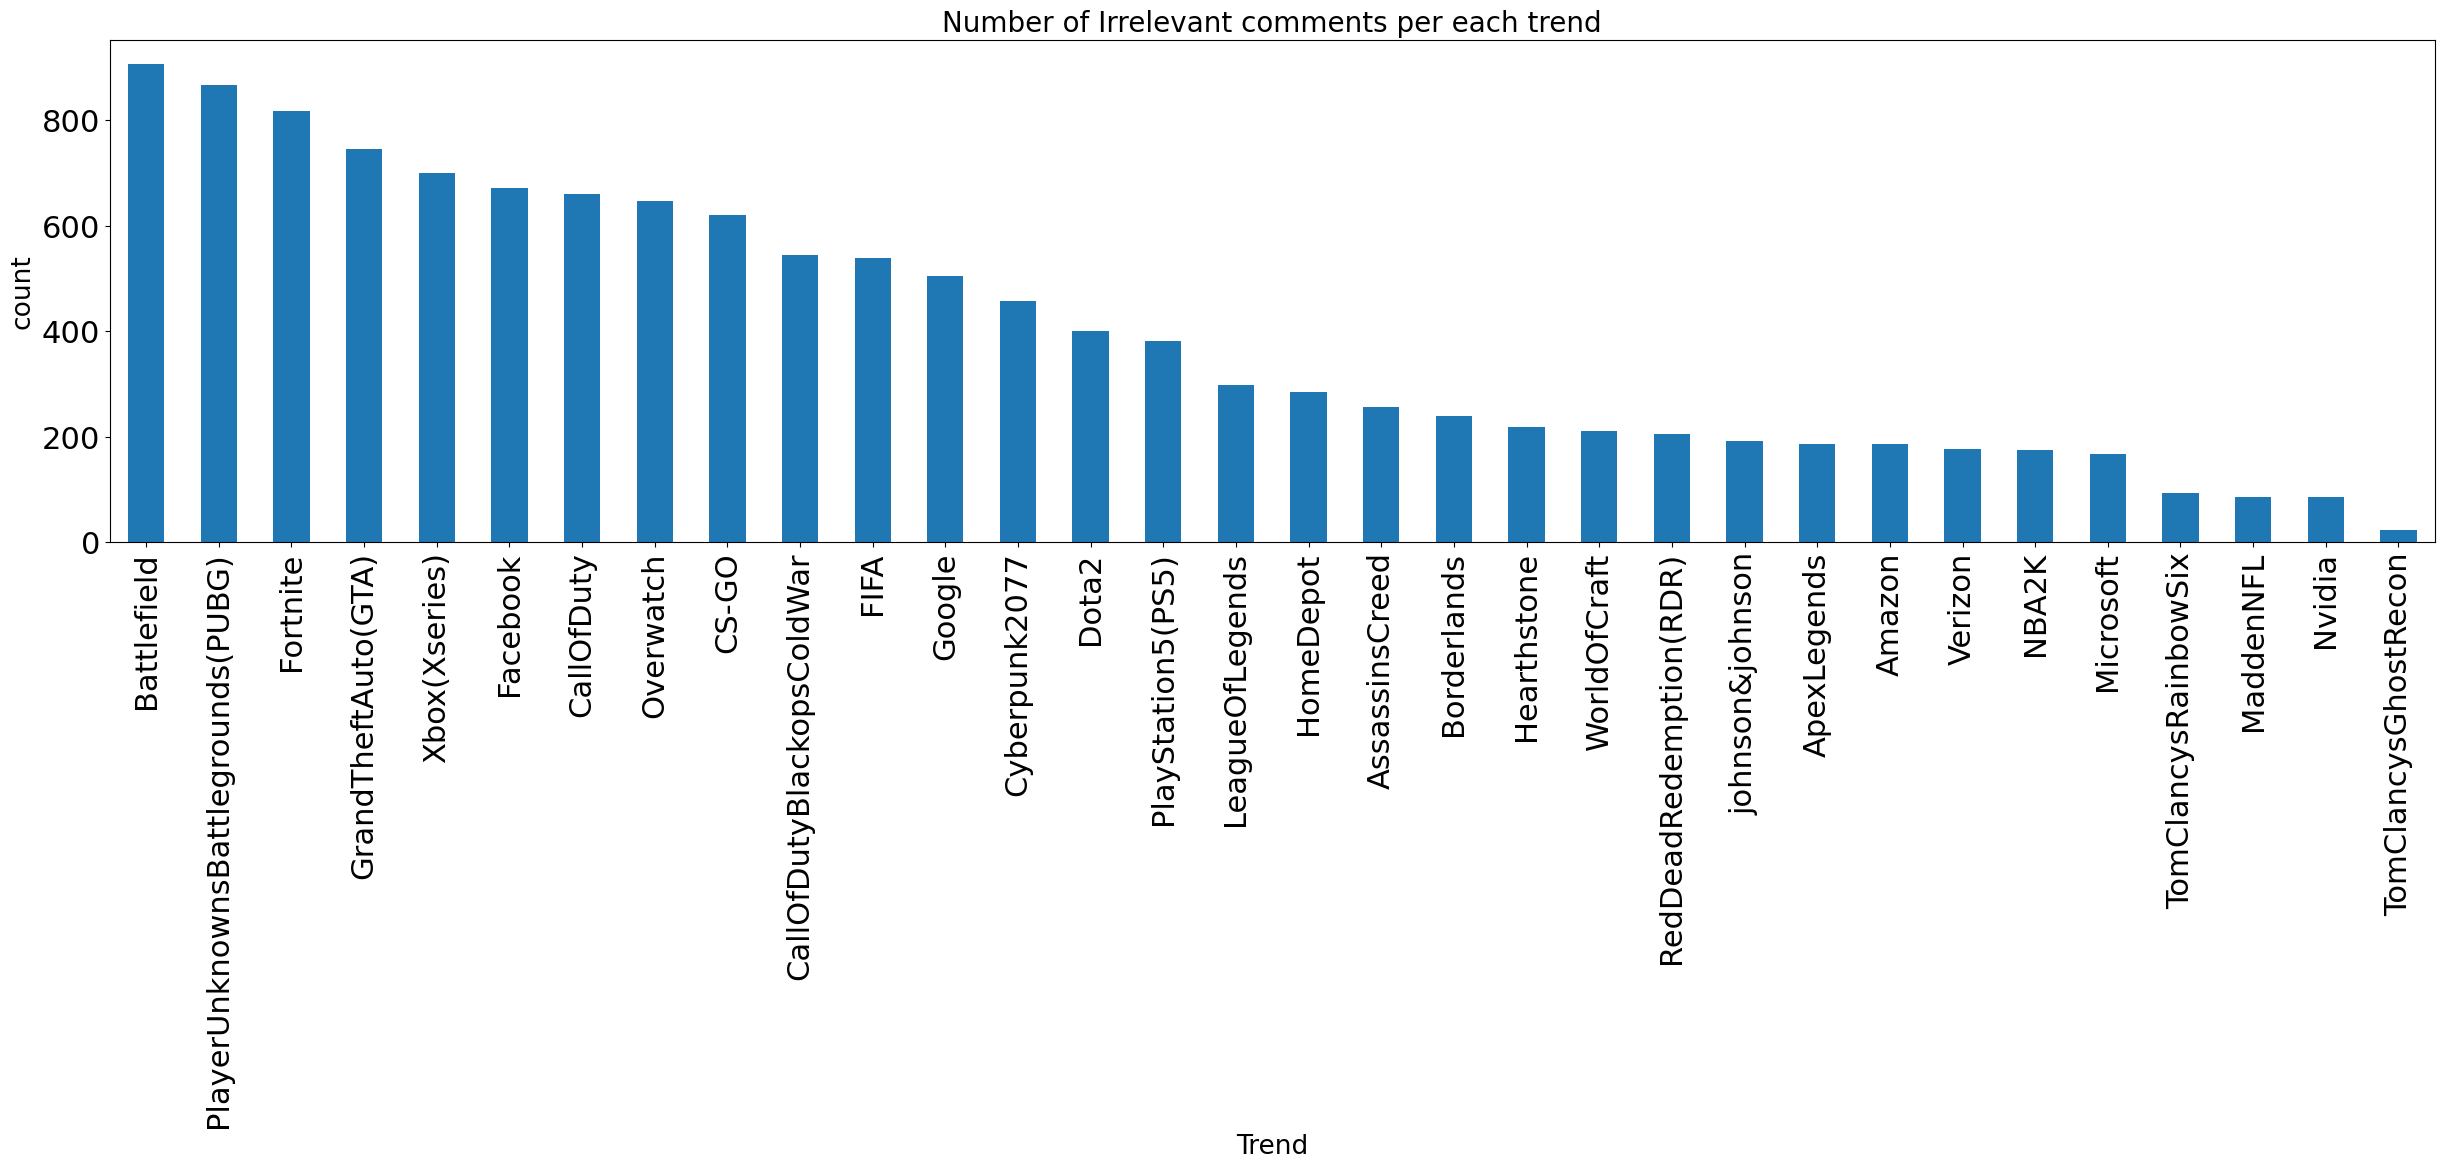

In [21]:
plot = 1
for i in df['Sentiment'].value_counts().index:
    plt.figure(figsize=(30,30))
    if plot <= 4 :
        ax = plt.subplot(4,1,plot)
        data = df[df['Sentiment'] == i]
        data['Trend'].value_counts().sort_values(ascending=False).plot(kind='bar')
        plt.title('Number of {} comments per each trend'.format(i),fontsize=20)
        plt.xlabel('Trend',fontsize=19)
        plt.ylabel('count',fontsize=19)
        plt.xticks(fontsize=22)
        plt.yticks(fontsize=22)
        
    plot += 1
plt.show()        

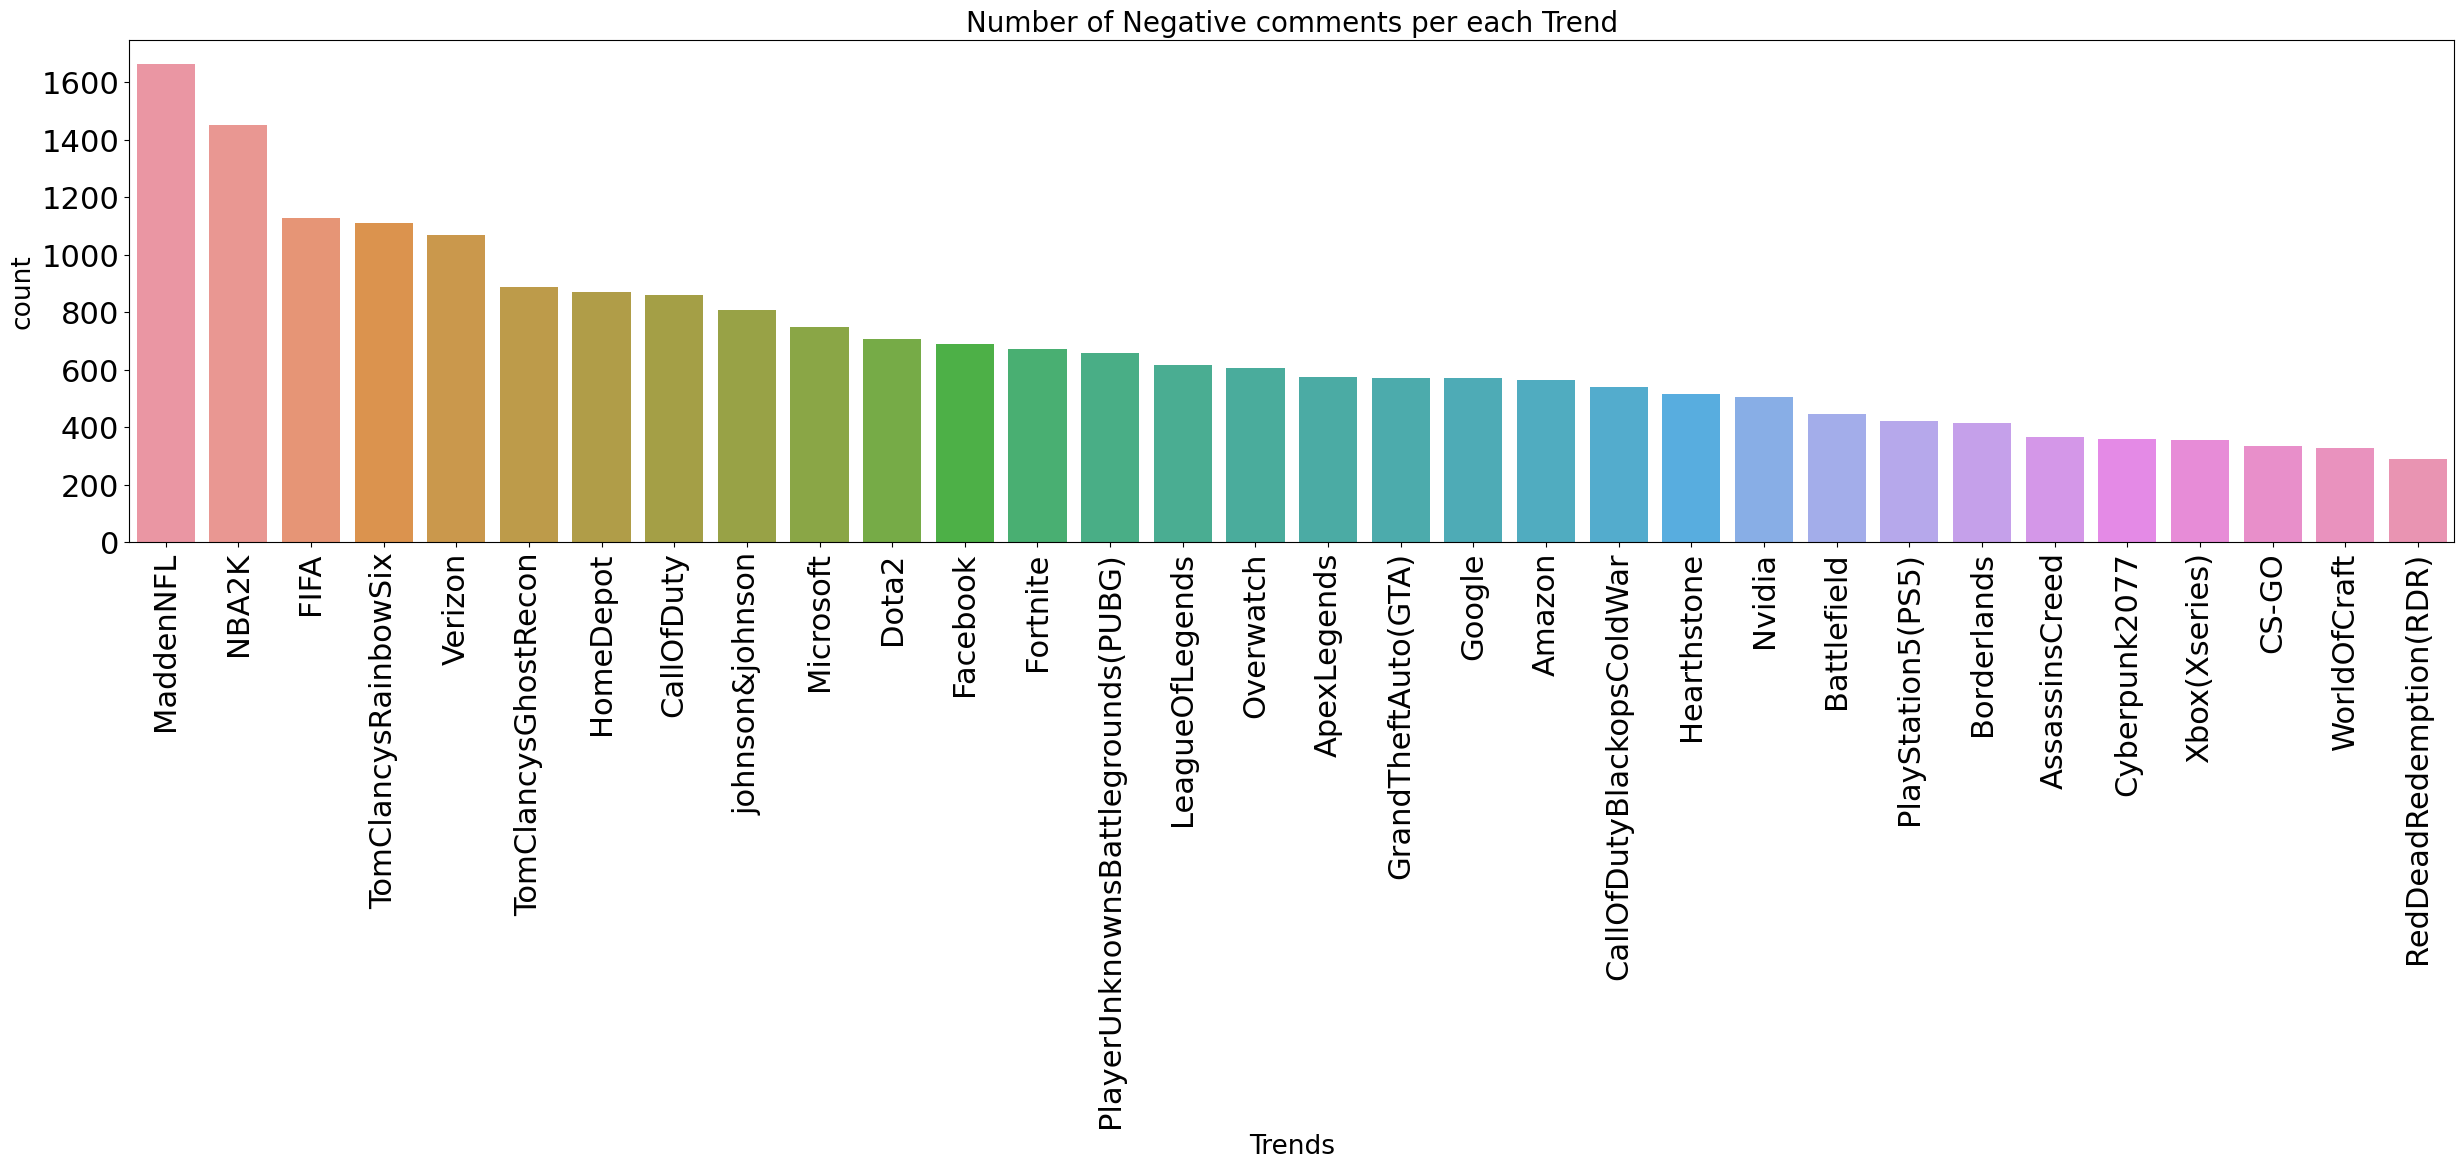

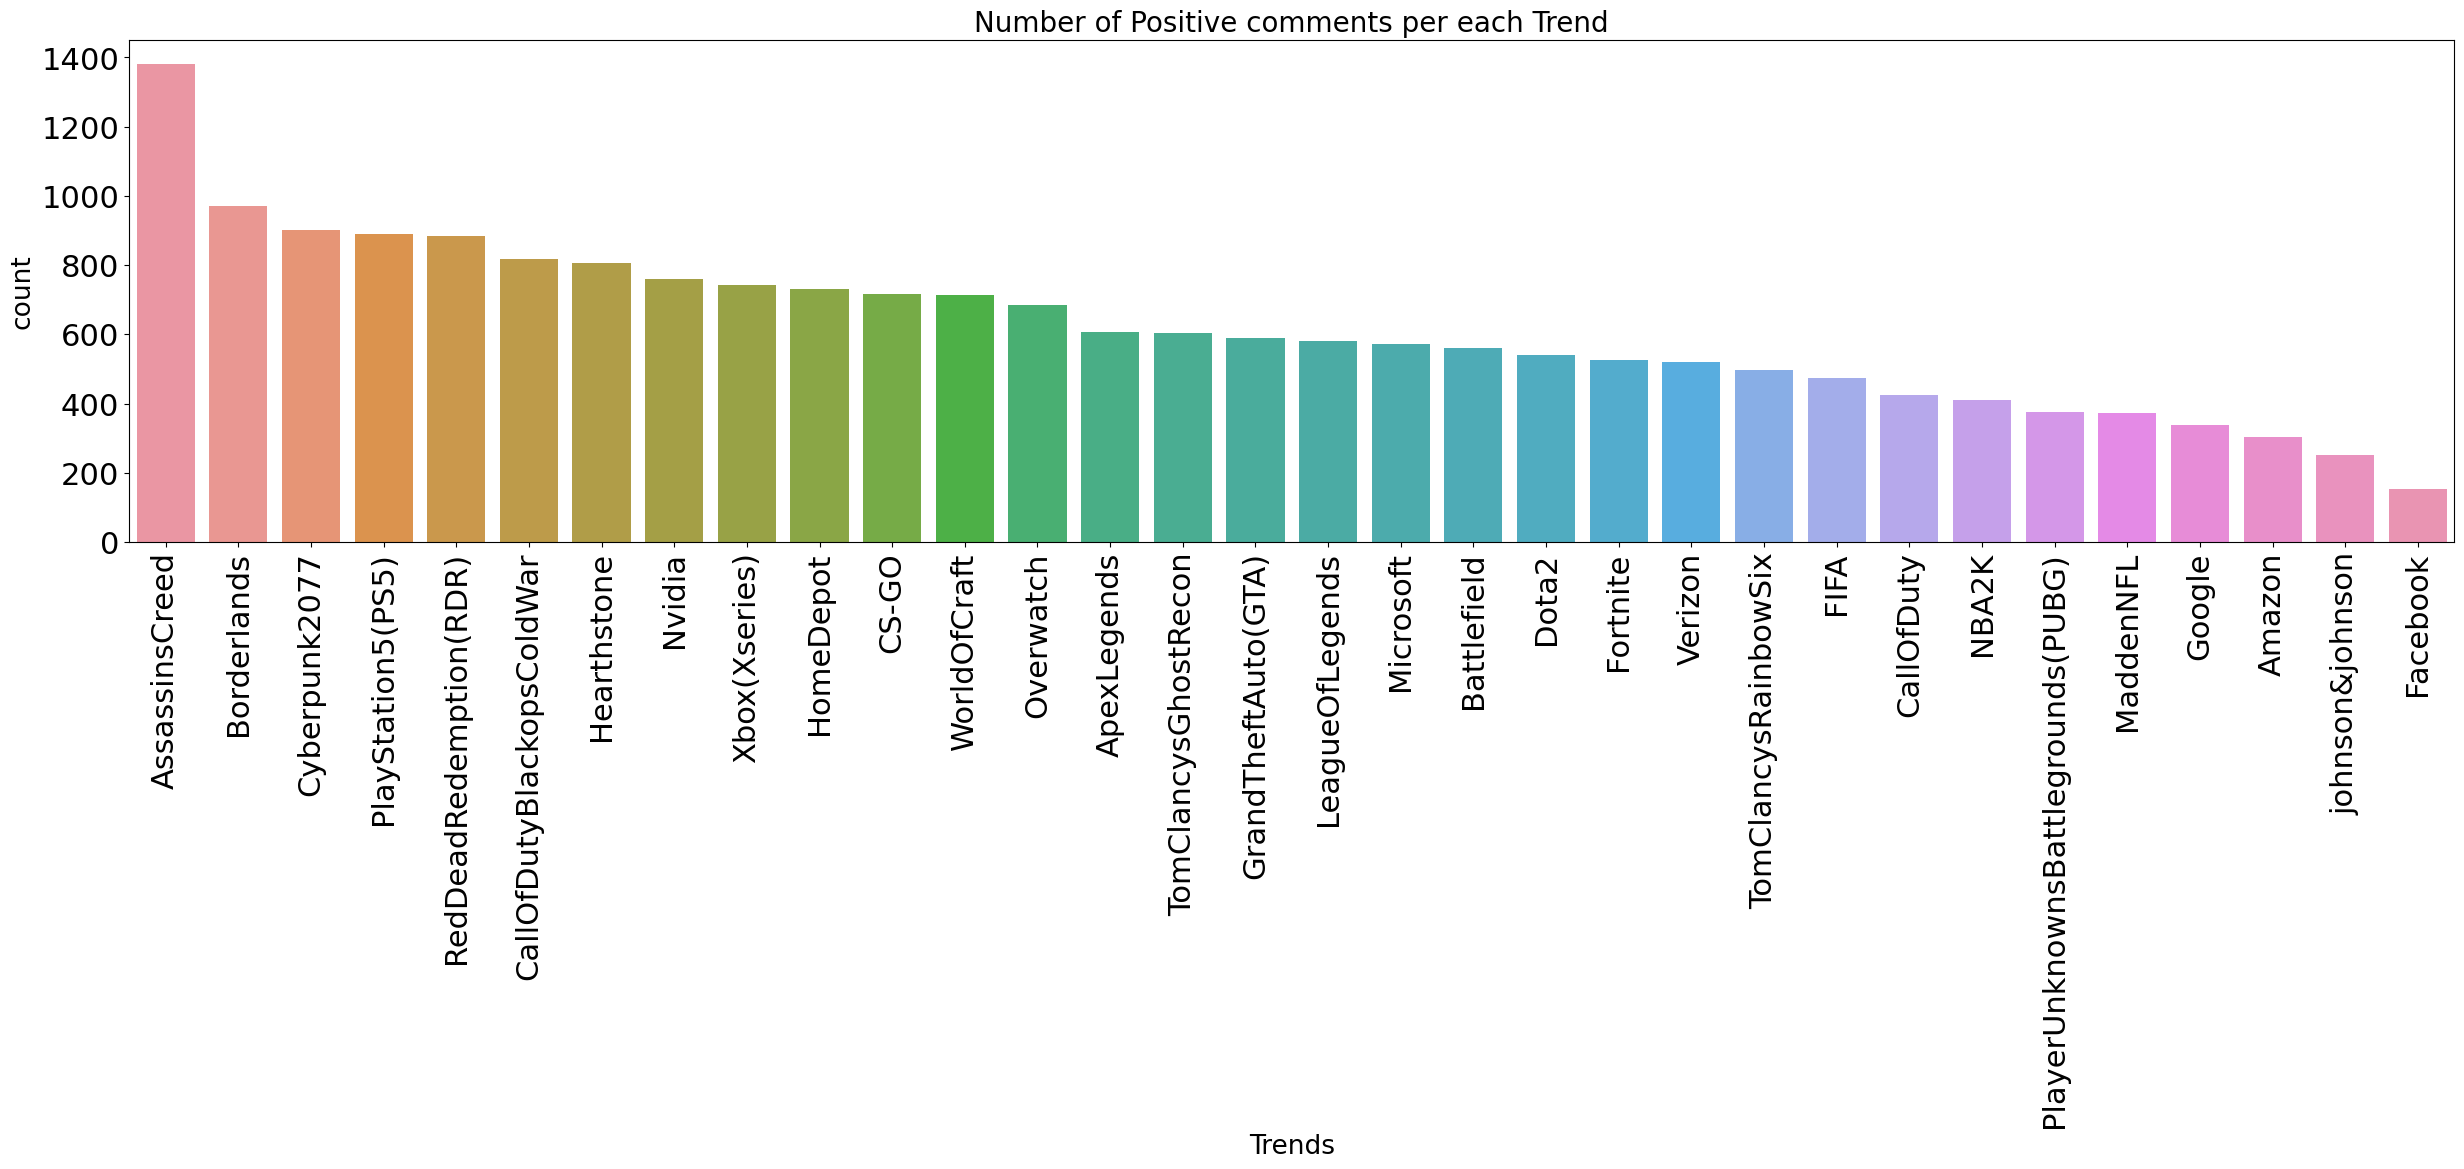

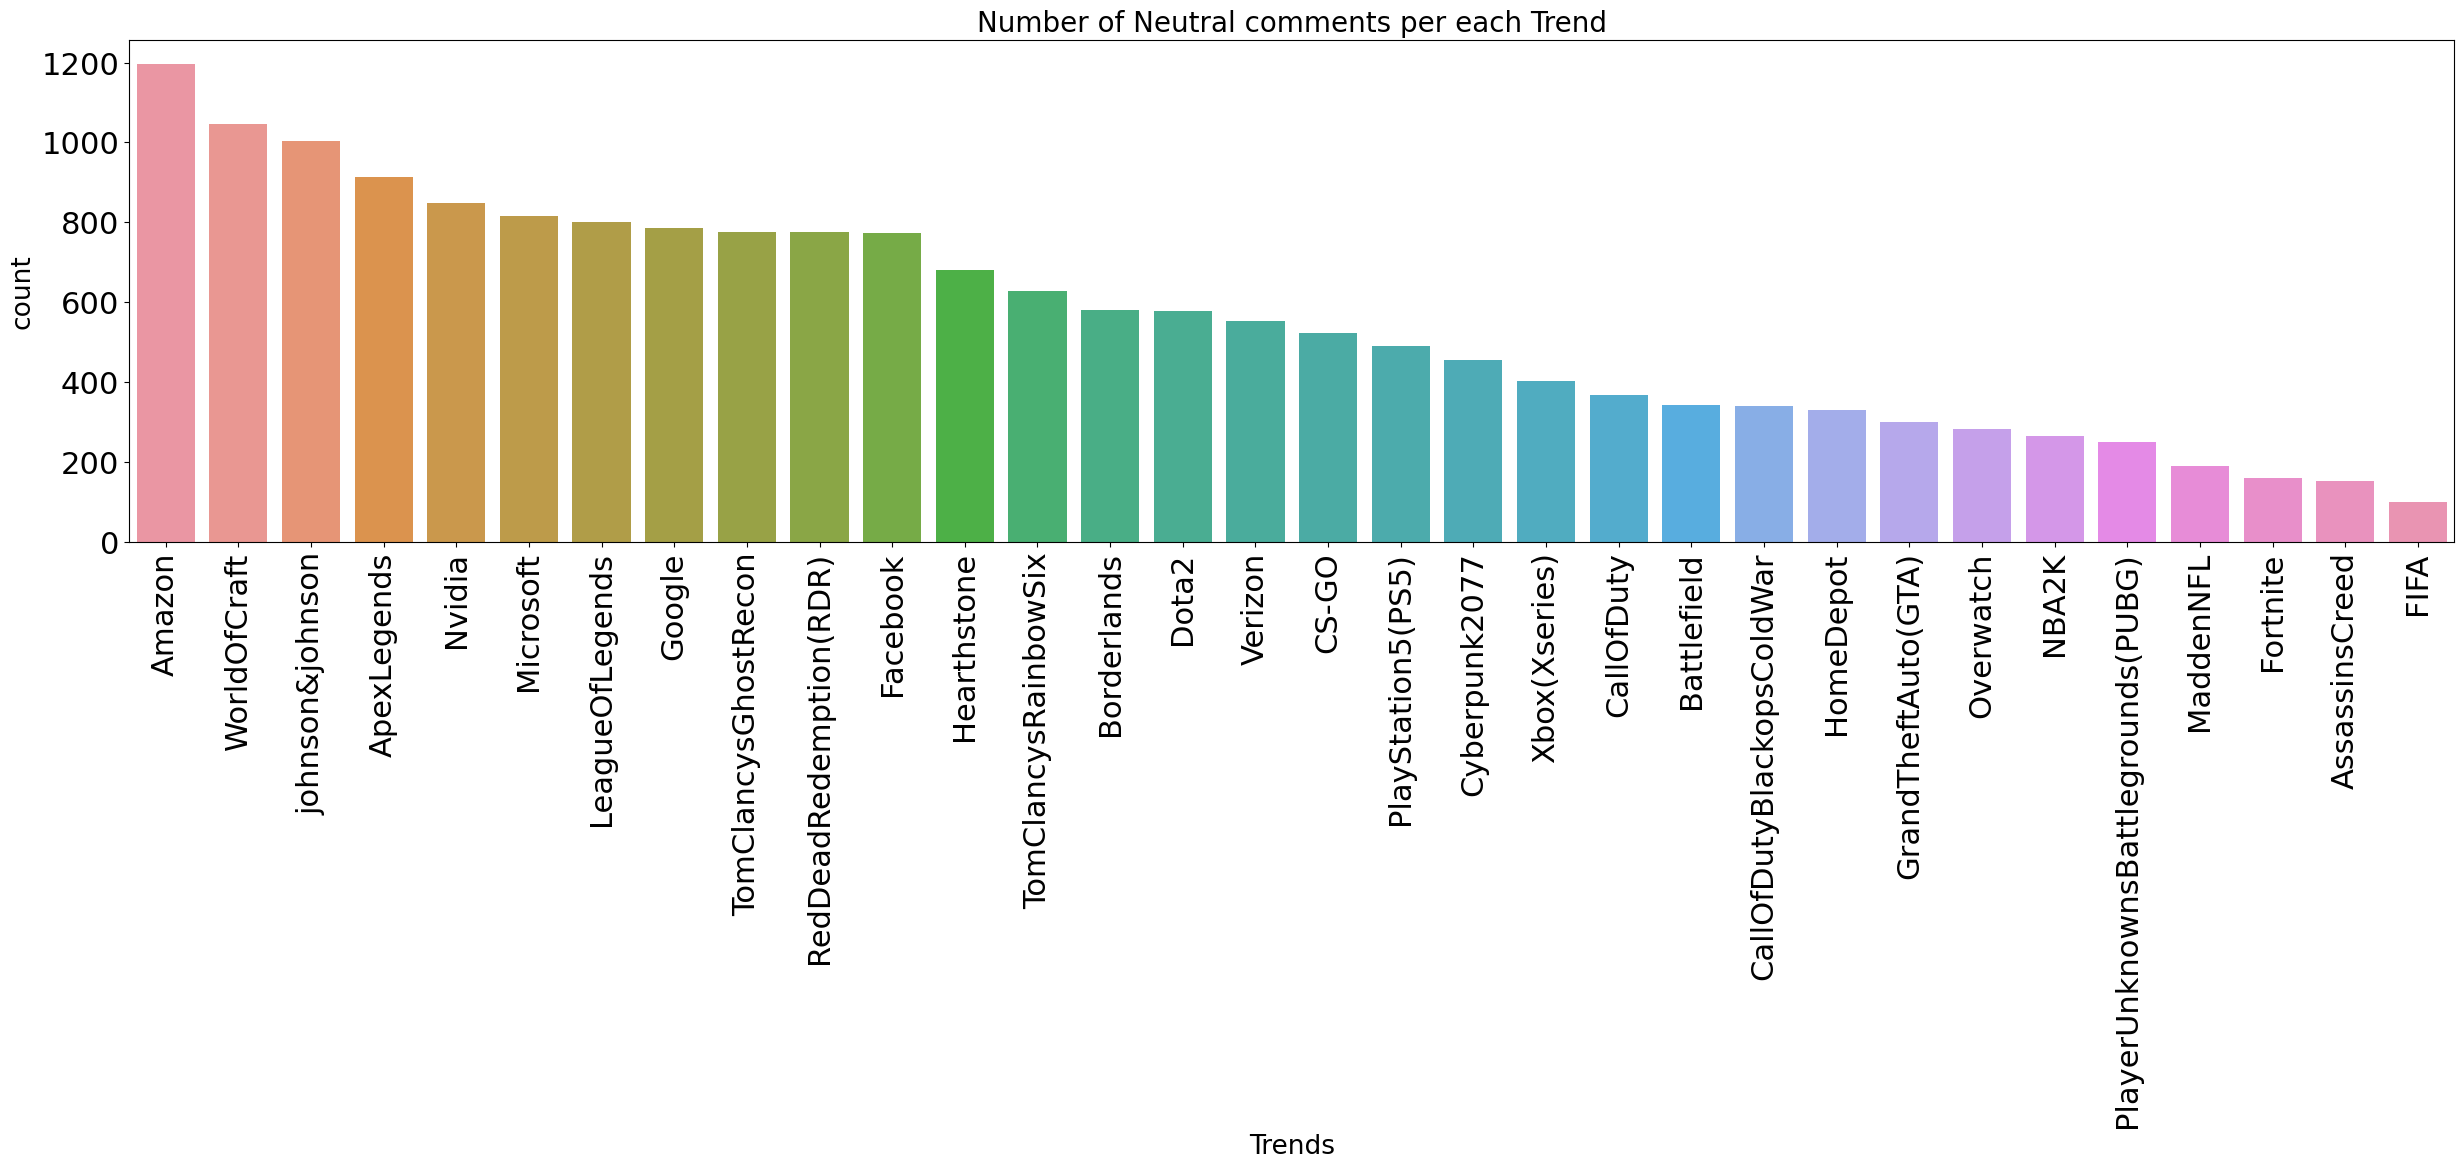

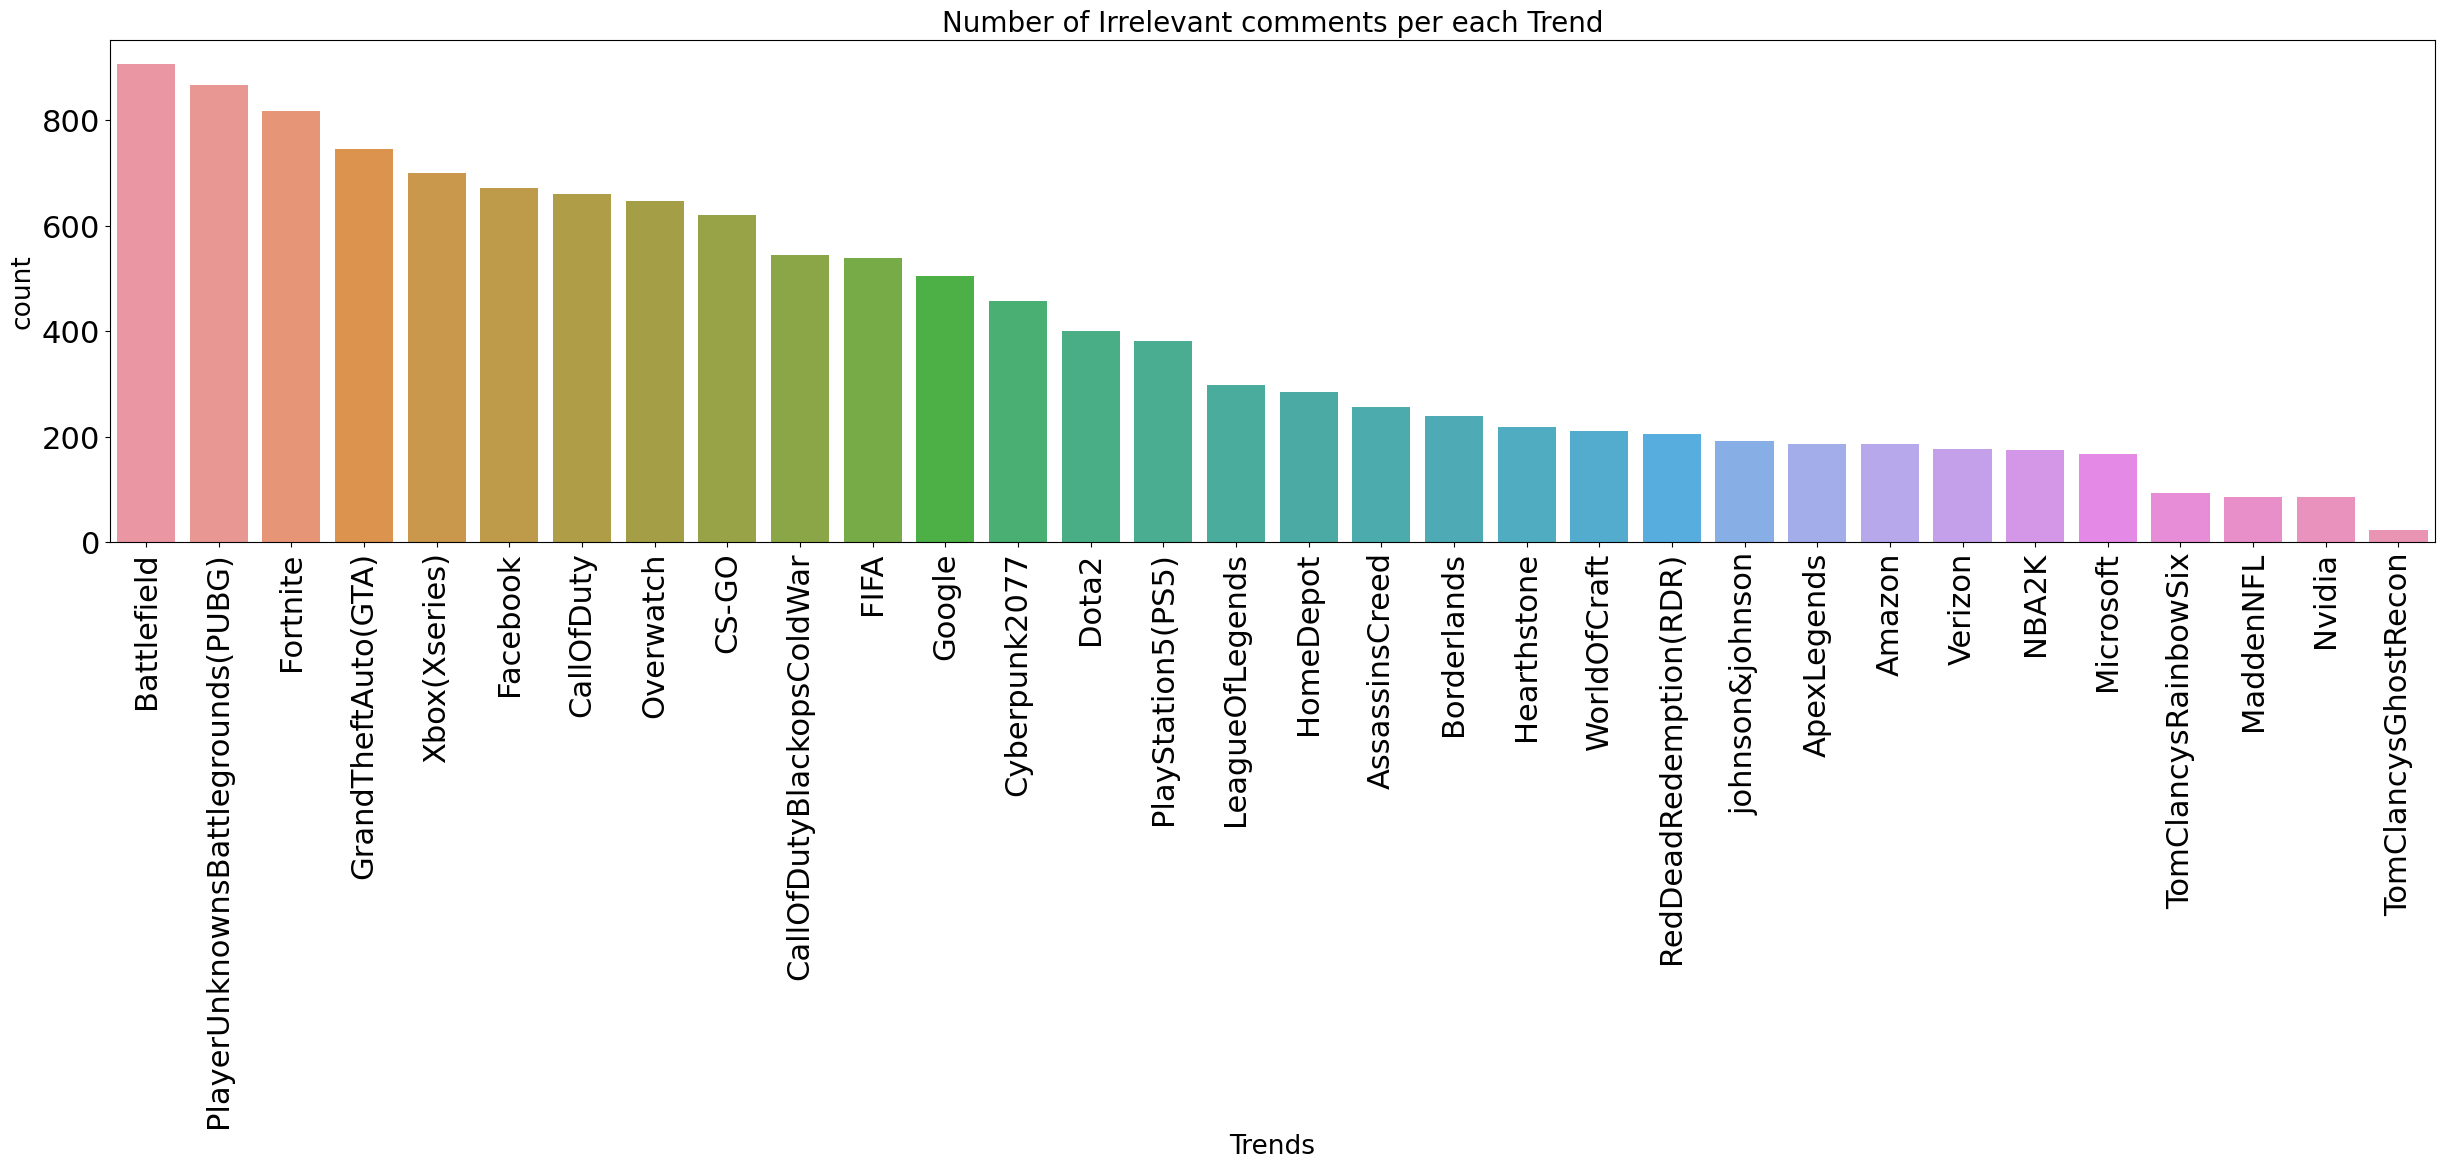

In [24]:
#Another Code

plot = 1
for i in df['Sentiment'].value_counts().index:
    plt.figure(figsize=(30,30))
    if plot <= 4 :
        ax = plt.subplot(4,1,plot)
        data = df[df['Sentiment'] == i]
        comment_num = data['Trend'].value_counts()
        sns.barplot(x =comment_num.index , y=comment_num.values )
        plt.title('Number of {} comments per each Trend'.format(i),fontsize=20)
        plt.xlabel('Trends',fontsize=19)
        plt.ylabel('count',fontsize=19)
        plt.xticks(rotation = 90 ,fontsize=22)
        plt.yticks(fontsize=22)
        
    plot += 1
plt.show()    
    
    

- MaddenNFL had the most of negative comments while RedDeadRedemption(RDR) got the lowest negative cooments

- AssassinsCreed got the most positive comments and Facebook got the lowest positive comments

- Amazon got the most neutral comments while Fifa got the lowest neutral comments

- Battlefield got the mose irrelevant comments while TomClancysGhostRecon got the lowest irrelevant comments